In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
predict = pd.read_csv("covid_19_india.csv")

In [4]:
predict.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [5]:
predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3711 entries, 0 to 3710
Data columns (total 9 columns):
Sno                         3711 non-null int64
Date                        3711 non-null object
Time                        3711 non-null object
State/UnionTerritory        3711 non-null object
ConfirmedIndianNational     3711 non-null object
ConfirmedForeignNational    3711 non-null object
Cured                       3711 non-null int64
Deaths                      3711 non-null int64
Confirmed                   3711 non-null int64
dtypes: int64(4), object(5)
memory usage: 261.0+ KB


In [6]:
predict.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [7]:
predict.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [8]:
predict.shape

(3711, 9)

In [9]:
df = pd.DataFrame(predict[predict['State/UnionTerritory']=="Assam"])

In [10]:
df.drop('Sno',axis=1, inplace=True)
df.drop('ConfirmedIndianNational',axis=1, inplace=True)
df.drop('ConfirmedForeignNational',axis=1, inplace=True)


In [11]:
df.head()

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
531,01/04/20,7:30 PM,Assam,0,0,1
560,02/04/20,6:00 PM,Assam,0,0,5
590,03/04/20,6:00 PM,Assam,0,0,16
621,04/04/20,6:00 PM,Assam,0,0,24
651,05/04/20,6:00 PM,Assam,0,0,26


In [12]:
df.dtypes

Date                    object
Time                    object
State/UnionTerritory    object
Cured                    int64
Deaths                   int64
Confirmed                int64
dtype: object

In [13]:
import datetime as dt
df.Date = pd.to_datetime(df.Date)
df['Date']=df['Date'].map(dt.datetime.toordinal)

In [14]:
df.head()

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
531,737428,7:30 PM,Assam,0,0,1
560,737459,6:00 PM,Assam,0,0,5
590,737488,6:00 PM,Assam,0,0,16
621,737519,6:00 PM,Assam,0,0,24
651,737549,6:00 PM,Assam,0,0,26


In [15]:
df.shape

(94, 6)

In [16]:
missing_values = df.isnull()

In [17]:
missing_values

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
531,False,False,False,False,False,False
560,False,False,False,False,False,False
590,False,False,False,False,False,False
621,False,False,False,False,False,False
651,False,False,False,False,False,False
681,False,False,False,False,False,False
711,False,False,False,False,False,False
742,False,False,False,False,False,False
773,False,False,False,False,False,False
804,False,False,False,False,False,False


In [31]:
x = np.array(df.Date)

In [21]:
y = np.array(df.Confirmed)
y

array([   1,    5,   16,   24,   26,   26,   26,   27,   28,   29,   29,
         29,   31,   31,   33,   33,   35,   35,   35,   35,   35,   35,
         35,   36,   36,   36,   36,   38,   38,   42,   42,   43,   43,
         43,   43,   43,   45,   54,   59,   63,   63,   65,   65,   80,
         87,   90,   92,  101,  107,  142,  170,  203,  259,  329,  378,
        526,  616,  781,  856, 1024, 1185, 1272, 1390, 1513, 1672, 1988,
       2153, 2397, 2565, 2776, 2937, 3092, 3319, 3498, 3718, 4049, 4158,
       4319, 4605, 4777, 4904, 4904, 5388, 5586, 5831, 6198, 6321, 6607,
       6816, 7206, 7752, 8227, 8582, 9013], dtype=int64)

In [36]:
linreg = LinearRegression()

In [37]:
x = x.reshape(-1,1)

In [38]:
linreg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
y_pred = linreg.predict(x)

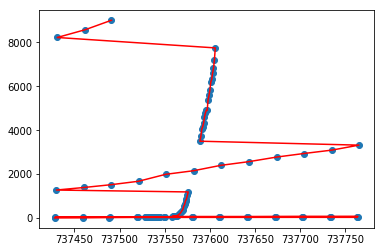

In [40]:
plt.scatter(x,y)
plt.plot(x,y,color="red")
plt.show()

In [41]:
z = np.array(df.Cured)
z

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    5,    5,    9,   12,   17,   19,   19,
         19,   19,   19,   19,   27,   27,   27,   29,   29,   32,   32,
         32,   32,   32,   32,   34,   34,   34,   34,   34,   39,   39,
         39,   41,   41,   41,   41,   41,   48,   54,   54,   55,   55,
         62,   62,   87,  104,  125,  163,  185,  277,  324,  413,  442,
        498,  547,  615,  665, 1085, 1249, 1432, 1537, 1584, 1960, 2166,
       2166, 2642, 2654, 3039, 3039, 3360, 3521, 3762, 3958, 4033, 4259,
       4500, 5088, 5333, 5647, 5851, 6106], dtype=int64)

In [42]:
linreg.fit(x,z)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
z_pred = linreg.predict(x)

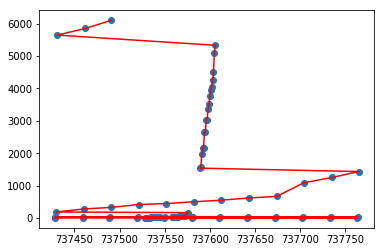

In [48]:
plt.scatter(x,z)
plt.plot(x,z,color="red")
plt.show()